In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
#masa corporal bmi
df.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.shape

(1338, 7)

In [8]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
#Group by age and count the number of people with each age
df.groupby('age')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#Hows the age distribution of the people
import plotly.express as px
fig = px.histogram(df, x='age', nbins=100, title='Histogram of age and sex', template='plotly_dark', color="sex")
fig.show()

In [11]:
fig = px.pie(df, values="age", names="sex", template="plotly_dark")
fig.show()

In [12]:
fig = px.scatter(df, x="bmi", y="charges", color= "smoker", facet_col="region", facet_row="sex", template="plotly_dark")
fig.show()

<AxesSubplot:>

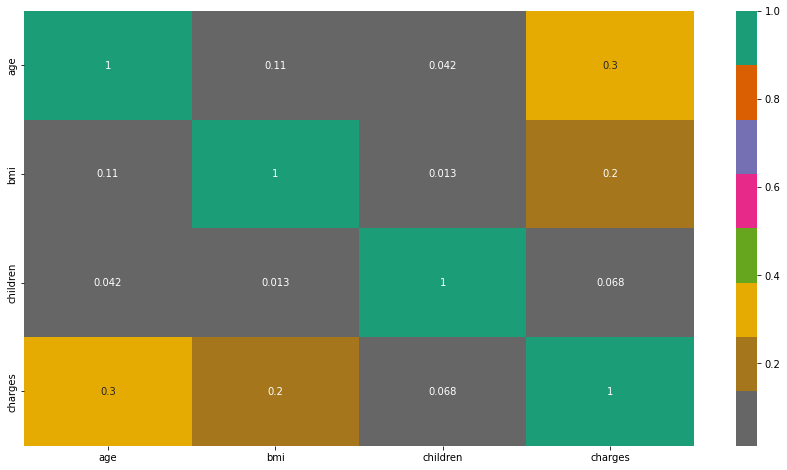

In [13]:

plt.figure(figsize = (15,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Dark2_r')



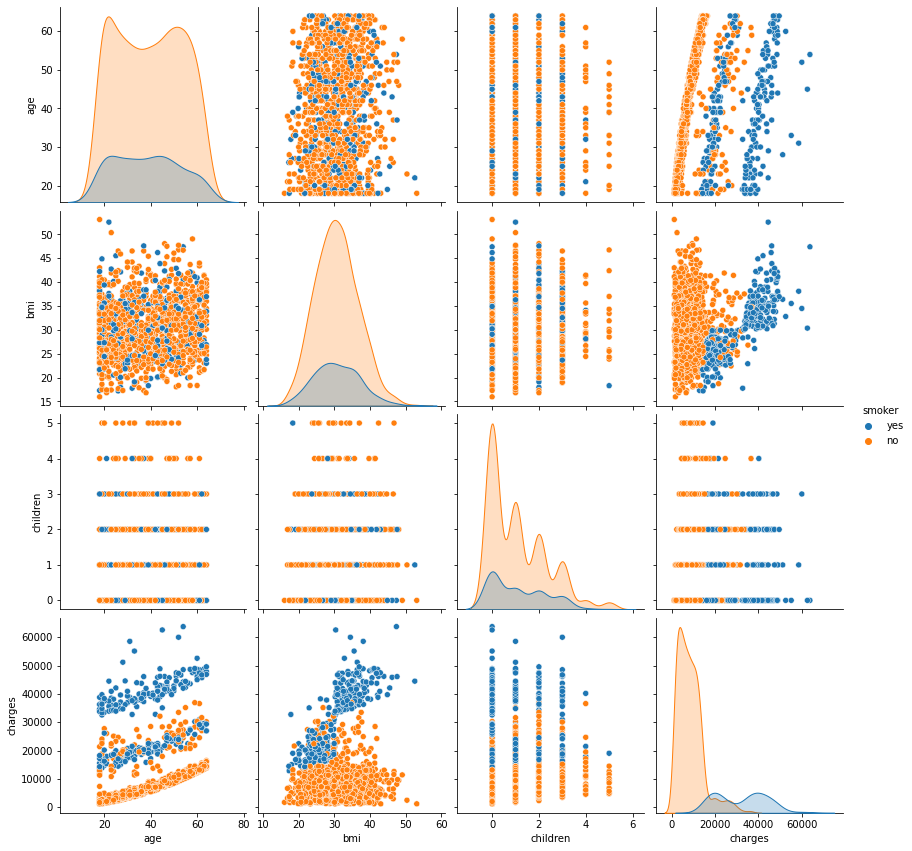

In [14]:
sns.pairplot(df, hue='smoker',height=3)

In [15]:
from pycaret.regression import *



In [16]:
salud = setup(data = df, target = 'charges',  session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])
             

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [17]:
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2868.6284,25527216.3787,5036.6765,0.8176,0.4721,0.3462,0.0300
llar,Lasso Least Angle Regression,3204.9707,25995010.4735,5084.2557,0.8165,0.4661,0.3431,0.0050
omp,Orthogonal Matching Pursuit,3167.1362,26343745.1791,5110.6374,0.8158,0.4267,0.3217,0.0030
br,Bayesian Ridge,3239.1070,26157676.2674,5100.7273,0.8151,0.4894,0.3484,0.0040
ridge,Ridge Regression,3236.9932,26221692.8000,5106.8395,0.8147,0.4720,0.3485,0.0040
lasso,Lasso Regression,3236.6416,26363714.2000,5120.6167,0.8138,0.4759,0.3486,0.1200
lr,Linear Regression,3250.4226,26435271.2000,5126.4573,0.8133,0.4797,0.3515,0.2750
catboost,CatBoost Regressor,2953.3070,26848410.2395,5162.1069,0.8080,0.4892,0.3551,2.6860
lightgbm,Light Gradient Boosting Machine,3066.2845,26755033.4401,5161.6322,0.8075,0.5466,0.3727,0.0200
rf,Random Forest Regressor,2866.7887,26965488.3171,5176.2907,0.8067,0.4938,0.3635,0.0920


In [18]:
GradientBoostingRegressor = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3119.8994,26168550.8842,5115.5206,0.8437,0.5126,0.4260
1,3189.7079,33915572.8551,5823.7078,0.8028,0.4589,0.3031
2,2843.7142,26023291.1729,5101.3029,0.6705,0.5588,0.4138
3,2986.9844,23402929.0548,4837.6574,0.8046,0.5157,0.4293
4,2928.5985,26198309.0129,5118.4284,0.8052,0.4855,0.3169
5,2880.2151,22741408.8643,4768.7953,0.8537,0.3901,0.2699
6,2484.2578,20784834.7330,4559.0388,0.8586,0.3568,0.2653
7,2846.7993,28940733.2786,5379.6592,0.8409,0.4706,0.2726
8,2444.8960,19156894.7700,4376.8590,0.8763,0.4006,0.3155


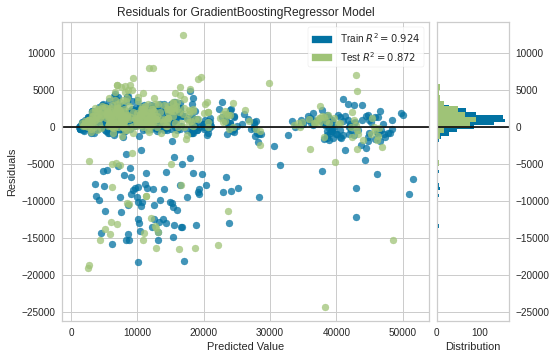

In [19]:
plot_model(GradientBoostingRegressor)


In [20]:
tuned_gbr = tune_model(GradientBoostingRegressor)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3489.1352,30496602.6920,5522.3729,0.8178,0.5353,0.4763
1,3370.7864,34580785.3940,5880.5430,0.7989,0.4780,0.3533
2,3347.7781,32708008.5771,5719.0916,0.5859,0.6661,0.4677
3,3386.3905,28763635.2094,5363.1740,0.7598,0.6797,0.5248
4,3923.3799,39936806.3324,6319.5574,0.7030,0.6773,0.5018
5,3130.9763,24705596.7775,4970.4725,0.8411,0.4952,0.3256
6,3125.7964,29831735.8516,5461.8436,0.7970,0.6052,0.3735
7,3009.9642,29498619.2968,5431.2631,0.8378,0.5161,0.3125
8,3050.6970,25275886.1154,5027.5129,0.8367,0.5610,0.4445


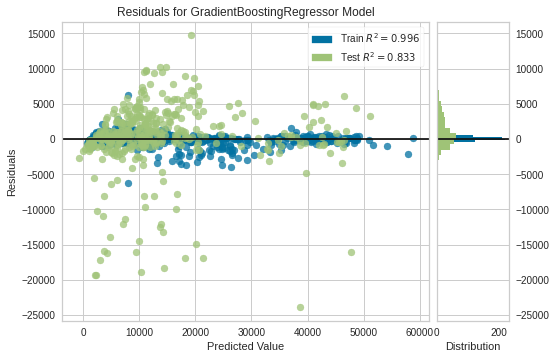

In [21]:
plot_model(tuned_gbr)

In [22]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3002.9893,23854612.6143,4884.1184,0.8330,0.5522,0.4123


,bmi_Power2,age_Power2,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,...,region_southwest_multiply_bmi_Power2,age_Power2_multiply_bmi_6.0,age_Power2_multiply_region_northwest,region_southeast_multiply_bmi_Power2,children_0_multiply_age_Power2,region_southeast_multiply_age_Power2,age_0.0_multiply_smoker_no,smoker_no_multiply_sex_female,charges,Label
0,2.259463,0.597312,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,2.259463,0.000000,0.597312,0.0,1.0,9800.888672,6904.332879
1,1.120715,-0.624317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,-0.624317,-0.000000,0.000000,-0.000000,-0.000000,0.0,0.0,4667.607422,9996.905176
2,0.034522,-0.886031,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034522,-0.000000,-0.000000,0.000000,-0.886031,-0.000000,0.0,0.0,34838.871094,35763.830683
3,-1.040384,-0.445997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.000000,-0.000000,-0.445997,-0.000000,-0.000000,-0.000000,0.0,0.0,5125.215820,8444.144923
4,-0.826600,1.661025,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.000000,0.000000,0.000000,-0.826600,1.661025,1.661025,0.0,0.0,12142.578125,18411.516557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-0.930567,-0.113309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.000000,-0.000000,-0.000000,-0.930567,-0.000000,-0.113309,0.0,0.0,6593.508301,10005.773242
398,1.776645,-1.212509,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.776645,-0.000000,-0.000000,0.000000,-1.212509,-0.000000,1.0,1.0,1759.338013,1038.720564
399,-0.221438,-1.021768,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.000000,-0.000000,-1.021768,-0.000000,0.0,0.0,18648.421875,20052.838422
400,-0.191160,-0.383008,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.000000,-0.000000,-0.383008,-0.000000,-0.383008,-0.000000,0.0,1.0,5272.175781,5664.242752


In [23]:
save_model(tuned_gbr, "salud_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.15, loss='ls',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.02,
                          